# Import Necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [26]:
df = pd.read_csv('bank_data.csv')
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [27]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [28]:
df.describe(include='object')

,recovery_strategy,sex
count,1882,1882
unique,5,2
top,Level 1 Recovery,Male
freq,670,973


# Check missing values

In [29]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

# So,No missing values in this data next we check data type of each column.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


# Checking Outliers

In [31]:
q1,q3=np.percentile(df['actual_recovery_amount'],[25,75])
q1,q3

(1045.1903002499998, 5417.23720675)

# Create Interquartile Range

In [32]:
iqr = q3-q1
iqr

4372.0469065

# Lower Extreme And Upper Extreme

In [33]:
lx = q1-1.5*iqr
ux = q3+1.5*iqr
lx,ux

(-5512.880059499999, 11975.3075665)

In [34]:
df = df.loc[df['actual_recovery_amount']<ux]
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1838,588,8620,9668.229463,Level 4 Recovery,82,Female
1844,581,8768,9839.572021,Level 4 Recovery,70,Female
1846,1860,8789,11422.411980,Level 4 Recovery,54,Male
1863,186,9290,10351.154260,Level 4 Recovery,55,Female


# Exploratory Data Analysis

# Create Age Range

In [35]:
df['age'].min()

18

In [36]:
s =df['age'].max()
s

84

In [37]:
sdf = list(range(0,int(s),10))
sdf

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [38]:
def age_range(age):
    if(age<=10):
        return '0-10'
    elif(age<=20):
        return '10-20'
    elif(age<=30):
        return '20-30'
    elif(age<=40):
        return '30-40'
    elif(age<=50):
        return '40-50'
    elif(age<=60):
        return '50-60'
    elif(age<=70):
        return '60-70'
    elif(age<=80):
        return '70-80'
    else:
        return '80-above'
    
df['age_range'] = df['age'].apply(age_range)
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.540000,Level 0 Recovery,19,Male,10-20
1,1150,486,416.090000,Level 0 Recovery,25,Female,20-30
2,380,527,429.350000,Level 0 Recovery,27,Male,20-30
3,1838,536,296.990000,Level 0 Recovery,25,Male,20-30
4,1995,541,346.385000,Level 0 Recovery,34,Male,30-40
...,...,...,...,...,...,...,...
1838,588,8620,9668.229463,Level 4 Recovery,82,Female,80-above
1844,581,8768,9839.572021,Level 4 Recovery,70,Female,60-70
1846,1860,8789,11422.411980,Level 4 Recovery,54,Male,50-60
1863,186,9290,10351.154260,Level 4 Recovery,55,Female,50-60


# Age Range Count

In [39]:
adf = df['age_range'].value_counts()
adf = adf.reset_index().rename(columns={'index':'age_range','age_range':'count'})
adf

,age_range,count
0,30-40,523
1,20-30,520
2,40-50,266
3,50-60,173
4,10-20,108
5,60-70,94
6,70-80,55
7,80-above,13


# Sex Count

In [40]:
sdf=df['sex'].value_counts()
sdf=sdf.reset_index().rename(columns={'index':'sex','sex':'count'})
sdf

,sex,count
0,Male,902
1,Female,850


# recovery_strategy Count

In [41]:
rdf = df['recovery_strategy'].value_counts()
rdf=rdf.reset_index().rename(columns={'index':'recovery_strategy','recovery_strategy':'count'})
rdf

,recovery_strategy,count
0,Level 1 Recovery,670
1,Level 3 Recovery,357
2,Level 2 Recovery,333
3,Level 0 Recovery,247
4,Level 4 Recovery,145


# Age_range wise total expected recovery amount

In [42]:
adf=df.groupby('age_range').agg(
total_expected_recovery_amount=('expected_recovery_amount','sum'))
adf=adf.reset_index().sort_values(by='total_expected_recovery_amount',ascending=False)
adf

,age_range,total_expected_recovery_amount
2,30-40,979609
3,40-50,782018
1,20-30,736623
4,50-60,726727
5,60-70,465952
6,70-80,299769
0,10-20,142624
7,80-above,84764


# Sexwise total and average actual_recovery_amount

In [43]:
ndf = df.groupby('sex').agg(
total_actual_recovery_amt=('actual_recovery_amount','sum')
# average_actual_recovery_amt=('actual_recovery_amount','mean')
)
ndf=ndf.reset_index().sort_values(by='total_actual_recovery_amt',ascending=False)
ndf

,sex,total_actual_recovery_amt
0,Female,2.725188e+06
1,Male,2.616071e+06


# recovery_strategy wise total actual_recovery_amount

In [44]:
bdf = df.groupby('recovery_strategy').agg(
maximum_actual_recovery_amount=('actual_recovery_amount','sum'))
bdf=bdf.reset_index().sort_values(by='maximum_actual_recovery_amount',ascending=False)
bdf

,recovery_strategy,maximum_actual_recovery_amount
3,Level 3 Recovery,2.091710e+06
4,Level 4 Recovery,1.277391e+06
2,Level 2 Recovery,9.713328e+05
1,Level 1 Recovery,8.721319e+05
0,Level 0 Recovery,1.286937e+05


# Data Visualization

# Gender Count - Pie Chart

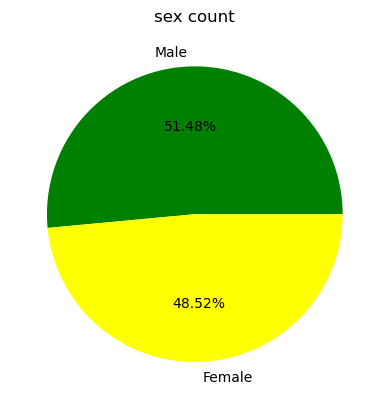

In [45]:
plt.pie(sdf['count'],labels=sdf['sex'],autopct='%.2f%%',colors=['green','yellow'],radius=1)
plt.title('sex count')
plt.show()

# recovery_strategy Count-Lineplot

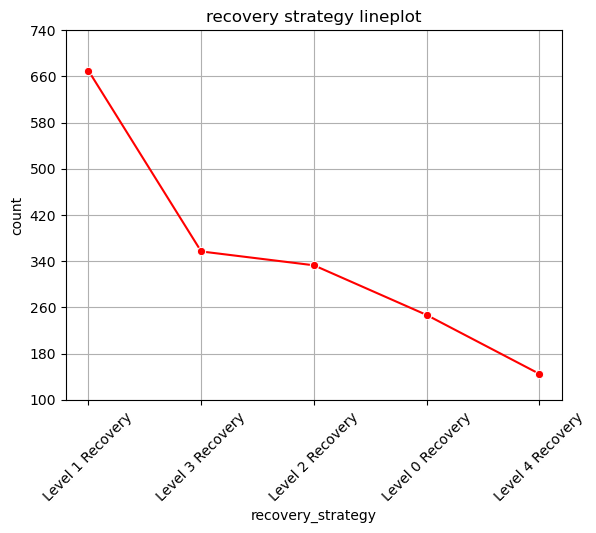

In [46]:
sns.lineplot(data=rdf,x='recovery_strategy',y='count',color='red',marker='o')
plt.yticks(np.arange(100,800,80))
plt.xticks(rotation=45)
plt.title('recovery strategy lineplot')
plt.grid()
plt.show()

# Age_range wise total expected recovery amount- Barplot

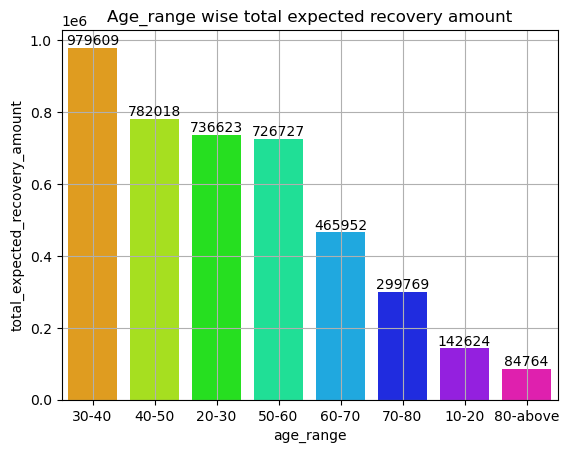

In [47]:
ax=sns.barplot(data=adf,x='age_range',y='total_expected_recovery_amount',palette='hsv')
ax.bar_label(ax.containers[0])
plt.grid()
plt.title('Age_range wise total expected recovery amount')
plt.show()

# Corelation matrix

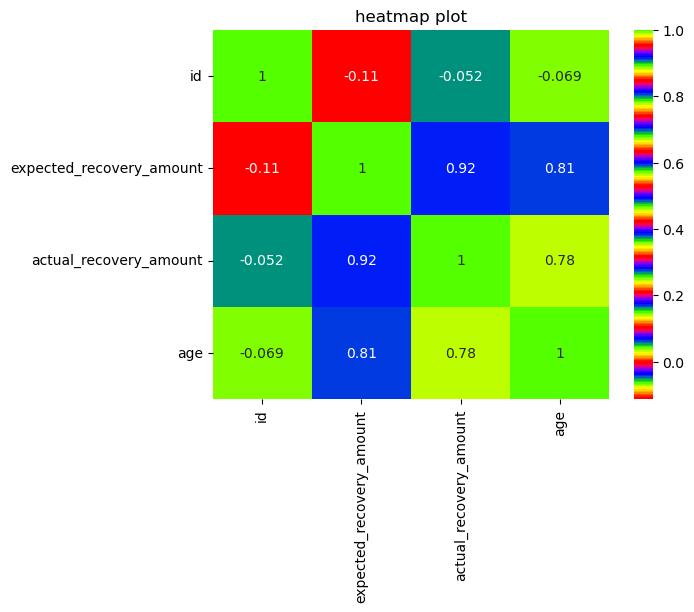

In [48]:
sns.heatmap(df.corr(),annot=True,cmap='prism')
plt.title('heatmap plot')
plt.show()

# Relation between expected_recovery_amount and actual_recovery_amount

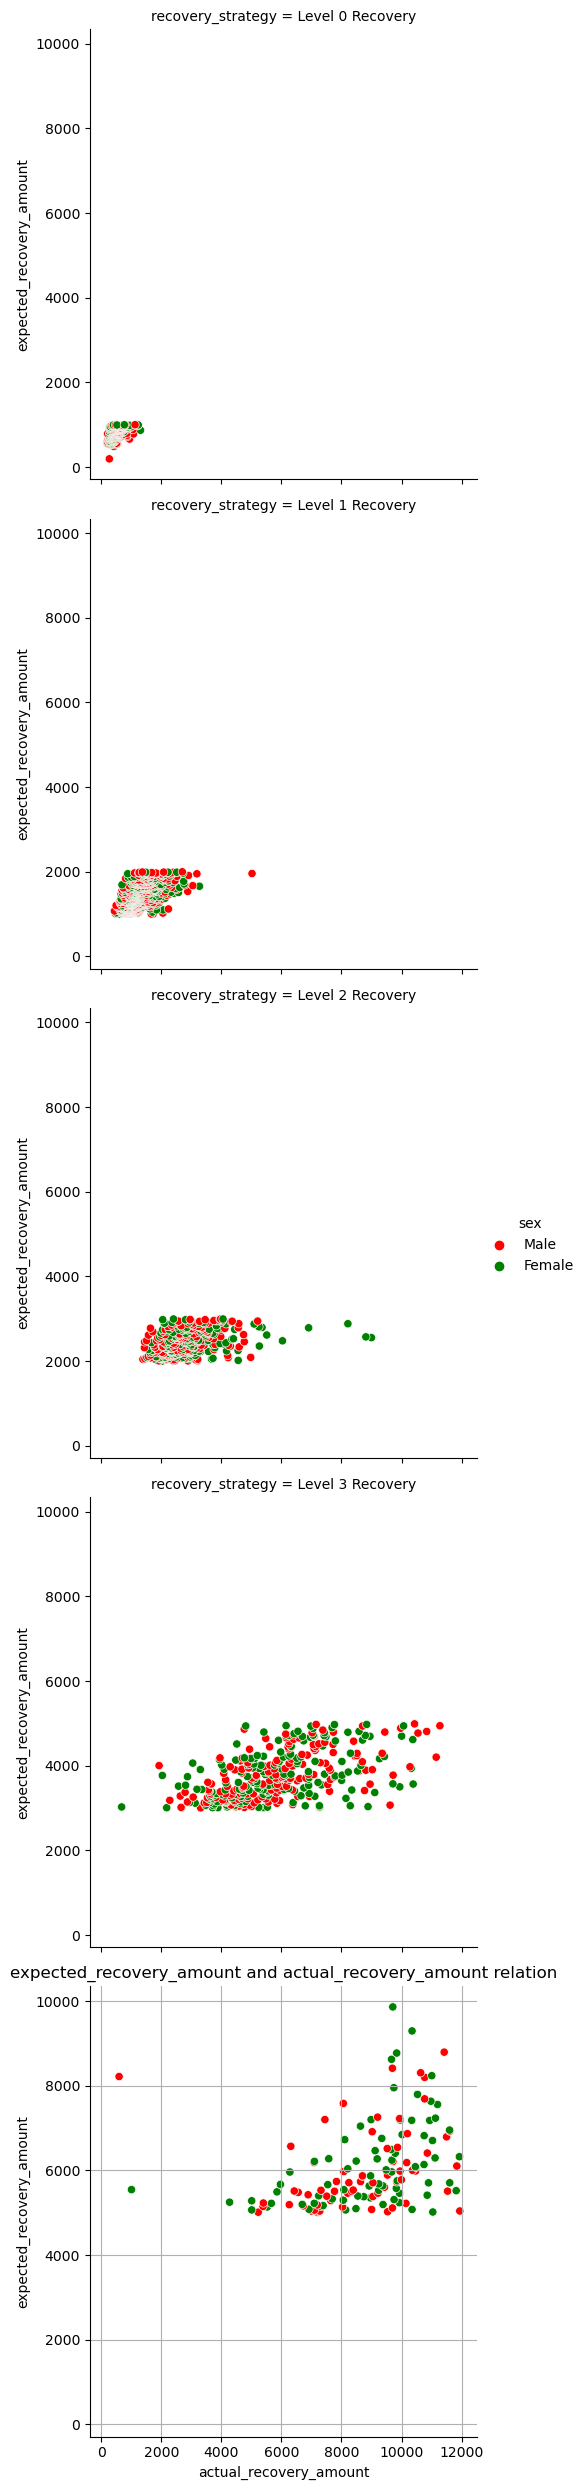

In [49]:
sns.relplot(data=df,x='actual_recovery_amount',y='expected_recovery_amount',hue='sex',palette=['red','green'],
            sizes=(50,120),row='recovery_strategy')
plt.grid()
plt.title('expected_recovery_amount and actual_recovery_amount relation')
plt.show()

# Sexwise total actual_recovery_amount-Barplot

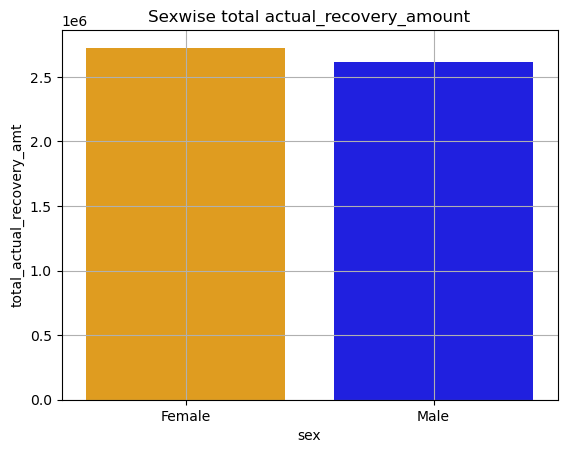

In [50]:
sns.barplot(data=ndf,x='sex',y='total_actual_recovery_amt',palette=['orange','blue'])
plt.title('Sexwise total actual_recovery_amount')
plt.grid()
plt.show()

# recovery_strategy wise total actual_recovery_amount-Barplot

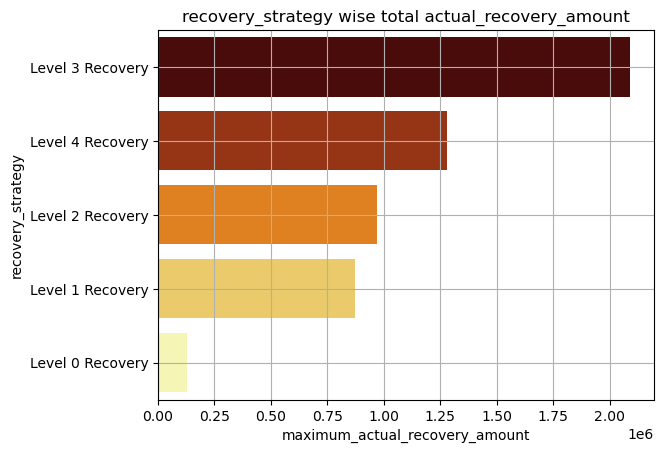

In [51]:
sns.barplot(data=bdf,y='recovery_strategy',x='maximum_actual_recovery_amount',palette='afmhot')
plt.title('recovery_strategy wise total actual_recovery_amount')
plt.grid()
plt.show()

## Age Vs Expected Recovery Amount Relation

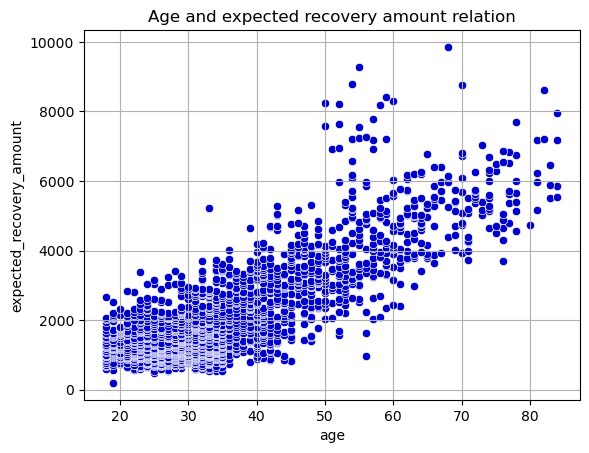

In [52]:
sns.scatterplot(data=df,x='age',y='expected_recovery_amount',marker='o',color='#0000CD')
plt.title('Age and expected recovery amount relation')
plt.grid()
plt.show()